<a href="https://colab.research.google.com/github/nadira1187/Image-classification-using-deep-learning/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function for displaying images
def show(img, title="Image"):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


Load an Image

Saving cute-curious-gray-and-white-kitten-in-a-long-shot-photo.jpg to cute-curious-gray-and-white-kitten-in-a-long-shot-photo.jpg


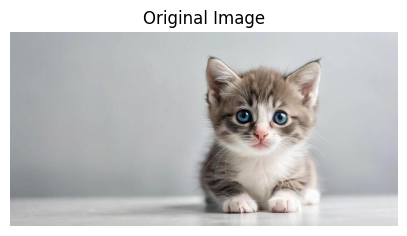

In [ ]:
from google.colab import files
uploaded = files.upload()

import cv2
img = cv2.imread(list(uploaded.keys())[0])
show(img, "Original Image")


Convert Image to Grayscale

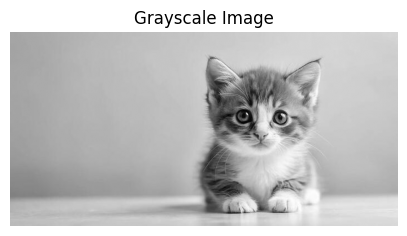

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray, "Grayscale Image")


Resize the Image

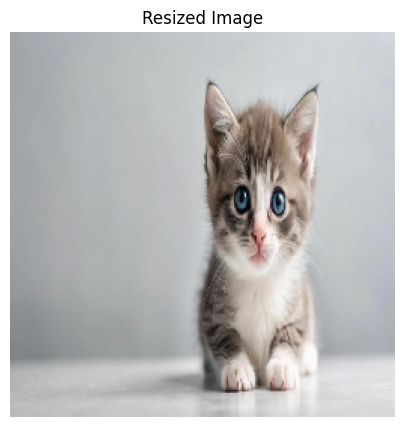

In [ ]:
resized = cv2.resize(img, (256,256))
show(resized, "Resized Image")


Masking

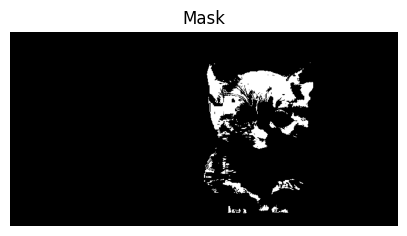

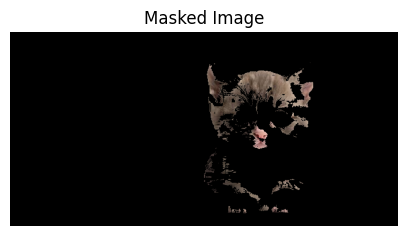

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Example color mask (change if needed)
lower = np.array([0, 50, 50])
upper = np.array([15, 255, 255])

mask = cv2.inRange(hsv, lower, upper)
masked_img = cv2.bitwise_and(img, img, mask=mask)

show(mask, "Mask")
show(masked_img, "Masked Image")


Image Segmentation

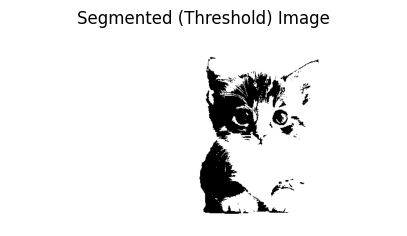

In [ ]:
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
show(thresh, "Segmented (Threshold) Image")


Deskewing (Fix Tilt)

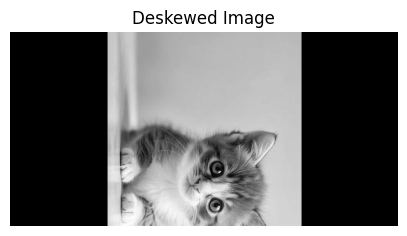

In [ ]:
coords = np.column_stack(np.where(gray > 0))
angle = cv2.minAreaRect(coords)[-1]

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
deskewed = cv2.warpAffine(gray, M, (w, h), flags=cv2.INTER_CUBIC)

show(deskewed, "Deskewed Image")


Thresholding

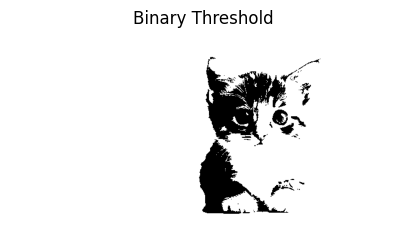

In [ ]:
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show(th, "Binary Threshold")


Filtering & Noise Removal

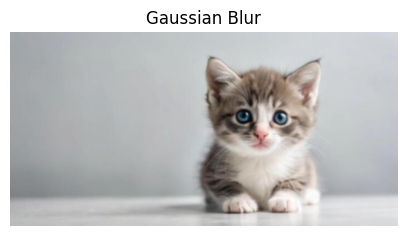

In [ ]:
blur = cv2.GaussianBlur(img, (5,5), 0)
show(blur, "Gaussian Blur")
